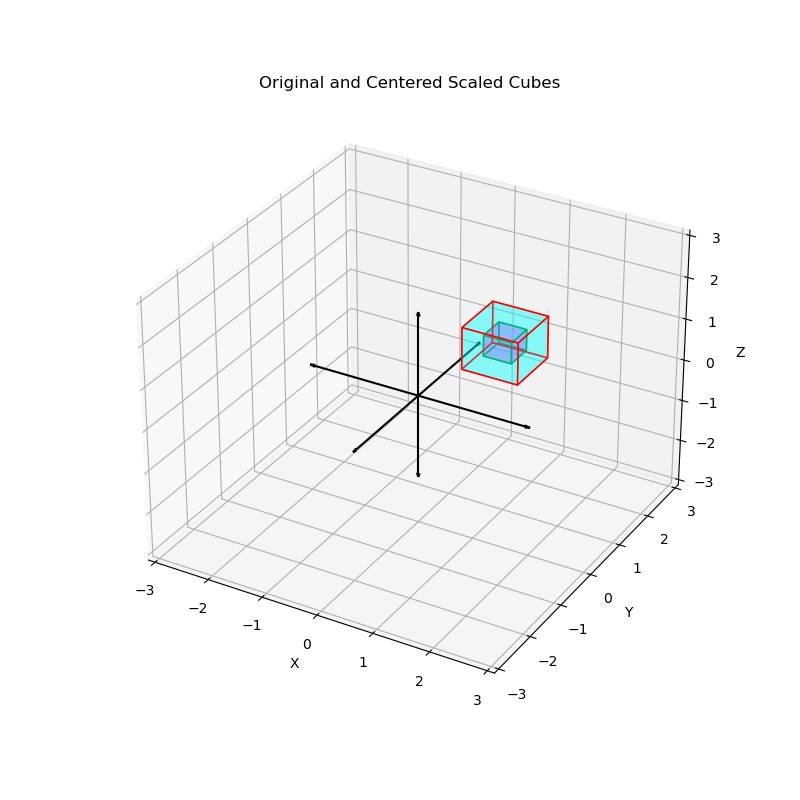

In [11]:
%matplotlib widget 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the vertices of a unit cube
vertices = np.array([
    [0.5, 0.5, 0.5], 
    [1.5, 0.5, 0.5], 
    [1.5, 1.5, 0.5],
    [0.5, 1.5, 0.5],
    [0.5, 0.5, 1.5],
    [1.5, 0.5, 1.5],
    [1.5, 1.5, 1.5],
    [0.5, 1.5, 1.5]
])

# Define the vertices that make up each face of the cube
faces = [
    [vertices[0], vertices[1], vertices[2], vertices[3]], # Bottom
    [vertices[4], vertices[5], vertices[6], vertices[7]], # Top
    [vertices[0], vertices[1], vertices[5], vertices[4]], # Front
    [vertices[2], vertices[3], vertices[7], vertices[6]], # Back
    [vertices[1], vertices[2], vertices[6], vertices[5]], # Right
    [vertices[0], vertices[3], vertices[7], vertices[4]]  # Left
]

# Scaling matrix
scale_factor = 0.5  # Scaling the cube down by a factor of 0.5 (reducing to half its size)
scaling_matrix = np.array([
    [scale_factor, 0, 0, 0],
    [0, scale_factor, 0, 0],
    [0, 0, scale_factor, 0],
    [0, 0, 0, 1]
])

# Apply scaling transformation to cube vertices
scaled_vertices_homogeneous = np.dot(np.hstack((vertices, np.ones((vertices.shape[0], 1)))), scaling_matrix).T
scaled_vertices = scaled_vertices_homogeneous[:3, :].T

# Center of the original cube
original_center = np.array([1, 1, 1])

# Calculate the translation needed to center the scaled cube inside the original cube
translation_needed = original_center - np.mean(scaled_vertices, axis=0)

# Apply translation to the scaled vertices
scaled_vertices = scaled_vertices + translation_needed

# Define the faces of the centered scaled cube
scaled_faces = [
    [scaled_vertices[0], scaled_vertices[1], scaled_vertices[2], scaled_vertices[3]], # Bottom
    [scaled_vertices[4], scaled_vertices[5], scaled_vertices[6], scaled_vertices[7]], # Top
    [scaled_vertices[0], scaled_vertices[1], scaled_vertices[5], scaled_vertices[4]], # Front
    [scaled_vertices[2], scaled_vertices[3], scaled_vertices[7], scaled_vertices[6]], # Back
    [scaled_vertices[1], scaled_vertices[2], scaled_vertices[6], scaled_vertices[5]], # Right
    [scaled_vertices[0], scaled_vertices[3], scaled_vertices[7], scaled_vertices[4]]  # Left
]

# Create a figure for the combined plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Original and Centered Scaled Cubes')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

# Add original cube faces to the plot
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))

# Add centered scaled cube faces to the plot
ax.add_collection3d(Poly3DCollection(scaled_faces, facecolors='magenta', linewidths=1, edgecolors='g', alpha=.25))

# Adding coordinate axes
ax.quiver(0, 0, 0, 2, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 2, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, 2, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, -2, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, -2, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, -2, color='black', arrow_length_ratio=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [12]:
# Define the reflection matrix across the XY plane
reflection_matrix = np.array([
    [-1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],  # Invert the Z coordinate
    [0, 0, 0, 1]
]) 

reflected_scaled_vertices_homogeneous = np.dot(np.hstack((scaled_vertices, np.ones((scaled_vertices.shape[0], 1)))), reflection_matrix).T
reflected_scaled_vertices = reflected_scaled_vertices_homogeneous[:3, :].T

# Define the faces of the reflected scaled cube using the reflected scaled vertices
reflected_scaled_faces = [
    [reflected_scaled_vertices[0], reflected_scaled_vertices[1], reflected_scaled_vertices[2], reflected_scaled_vertices[3]], # Bottom
    [reflected_scaled_vertices[4], reflected_scaled_vertices[5], reflected_scaled_vertices[6], reflected_scaled_vertices[7]], # Top
    [reflected_scaled_vertices[0], reflected_scaled_vertices[1], reflected_scaled_vertices[5], reflected_scaled_vertices[4]], # Front
    [reflected_scaled_vertices[2], reflected_scaled_vertices[3], reflected_scaled_vertices[7], reflected_scaled_vertices[6]], # Back
    [reflected_scaled_vertices[1], reflected_scaled_vertices[2], reflected_scaled_vertices[6], reflected_scaled_vertices[5]], # Right
    [reflected_scaled_vertices[0], reflected_scaled_vertices[3], reflected_scaled_vertices[7], reflected_scaled_vertices[4]]  # Left
] 

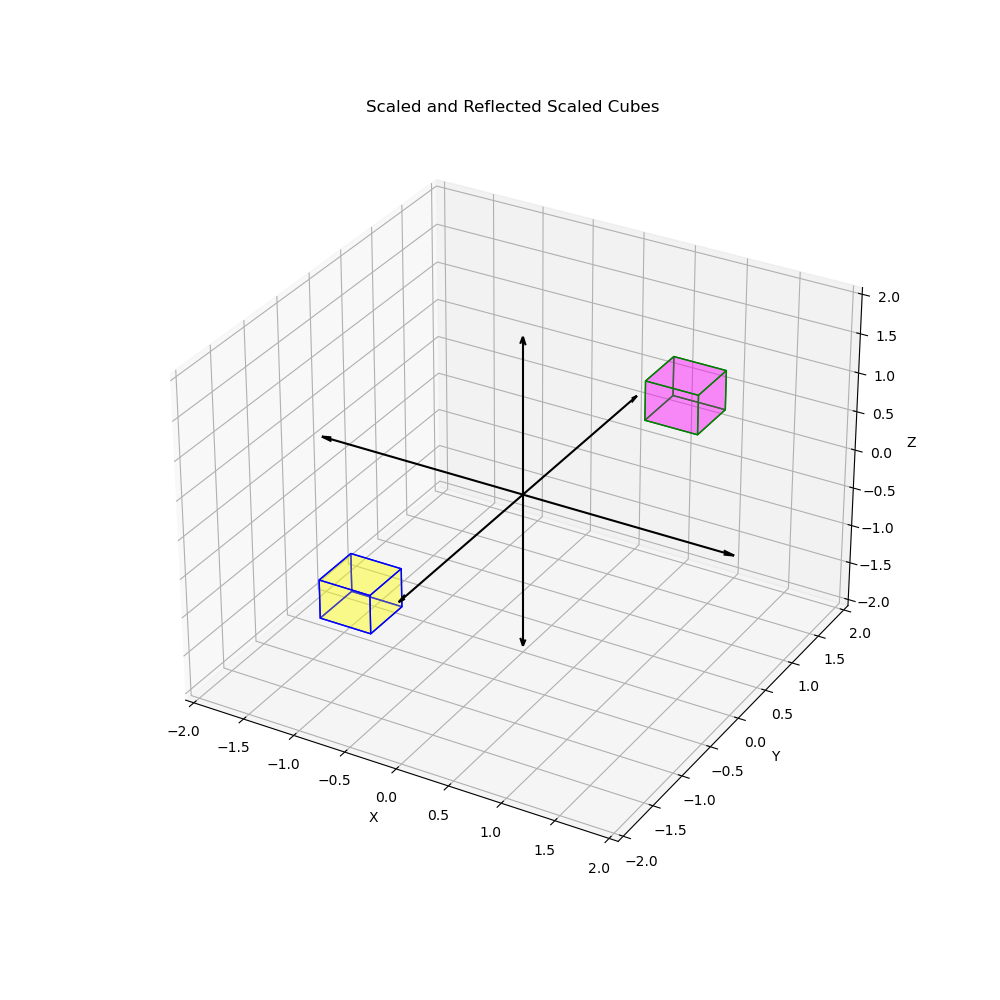

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Scaled and Reflected Scaled Cubes')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Add scaled cube faces to the plot
ax.add_collection3d(Poly3DCollection(scaled_faces, facecolors='magenta', linewidths=1, edgecolors='g', alpha=.25))

# Add reflected scaled cube faces to the plot
ax.add_collection3d(Poly3DCollection(reflected_scaled_faces, facecolors='yellow', linewidths=1, edgecolors='b', alpha=.25))

# Adding coordinate axes
ax.quiver(0, 0, 0, 2, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 2, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, 2, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, -2, 0, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, -2, 0, color='black', arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, -2, color='black', arrow_length_ratio=0.05)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()